# 05 超参数

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.9888888888888889

寻找最好的k

In [11]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    score = knn_clf.score(X_test,y_test)
    if score > best_score:
        best_score = score
        best_k = k

print("best_k = ",best_k)
print("best_score = ",best_score)

best_k =  4
best_score =  0.9916666666666667


# 是否考虑距离？

考虑权重weight

In [12]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform","distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_method = method
print("best_method = ",best_method)
print("best_k = ",best_k)
print("best_score = ",best_score)

best_method =  uniform
best_k =  4
best_score =  0.9916666666666667


考虑距离计算公式-搜索明可夫斯基距离相对应的p

In [13]:
best_p = -1
best_score = 0.0
best_k = -1
for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights='distance',p=p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
print("best_p = ",best_p)
print("best_k = ",best_k)
print("best_score = ",best_score)

best_p =  2
best_k =  3
best_score =  0.9888888888888889


总结：
1、超参数：在算法运行前需要决定的参数
   模型参数：算法过程中学习的参数
2、以上用到for循环-网格搜索。其中weights=distance时用到超参数p,
而用weights=uniform时不需要用到超参数p,可见超参数之间还有关联关系。

# sklearn中的网格搜索方式-Grid Search

In [15]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]  
    }
]

In [16]:
knn_clf = KNeighborsClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid)

In [18]:
%%time
grid_search.fit(X_train,y_train)

Wall time: 1min 10s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [20]:
grid_search.best_score_

0.9860820751064653

In [21]:
%%time
# n_jobs为处理核数，-1默认为全部核，verbose为显示运算过程
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s


Wall time: 19.6 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.5s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [22]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [23]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

# 07数据归一化处理

In [24]:
import numpy as np
import matplotlib.pyplot as plt

最值归一化

In [25]:
x = np.random.randint(0,100,100)

In [26]:
x

array([33, 94, 85, 91, 44, 33, 12, 64, 86, 77, 89, 34, 59, 53, 37, 95, 40,
       12, 42, 17, 45, 74, 92, 78, 93,  8, 11, 98, 77, 17, 79, 19,  2,  2,
       35, 82, 62, 65,  8, 10, 77, 68, 27,  8, 92, 13,  1, 76, 80, 33,  2,
       17, 86,  2, 69, 62, 73, 14, 18, 57, 46, 88,  0, 27, 95, 41, 64, 30,
       37, 58,  4, 91, 52, 65, 90, 99, 49, 88, 80, 32, 91, 23, 59, 45, 80,
       74,  8, 12, 92, 88, 44, 59, 62, 99, 99, 82, 16, 94, 61, 37])

In [27]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.33333333, 0.94949495, 0.85858586, 0.91919192, 0.44444444,
       0.33333333, 0.12121212, 0.64646465, 0.86868687, 0.77777778,
       0.8989899 , 0.34343434, 0.5959596 , 0.53535354, 0.37373737,
       0.95959596, 0.4040404 , 0.12121212, 0.42424242, 0.17171717,
       0.45454545, 0.74747475, 0.92929293, 0.78787879, 0.93939394,
       0.08080808, 0.11111111, 0.98989899, 0.77777778, 0.17171717,
       0.7979798 , 0.19191919, 0.02020202, 0.02020202, 0.35353535,
       0.82828283, 0.62626263, 0.65656566, 0.08080808, 0.1010101 ,
       0.77777778, 0.68686869, 0.27272727, 0.08080808, 0.92929293,
       0.13131313, 0.01010101, 0.76767677, 0.80808081, 0.33333333,
       0.02020202, 0.17171717, 0.86868687, 0.02020202, 0.6969697 ,
       0.62626263, 0.73737374, 0.14141414, 0.18181818, 0.57575758,
       0.46464646, 0.88888889, 0.        , 0.27272727, 0.95959596,
       0.41414141, 0.64646465, 0.3030303 , 0.37373737, 0.58585859,
       0.04040404, 0.91919192, 0.52525253, 0.65656566, 0.90909

In [28]:
X = np.random.randint(0,100,(50,2))

In [34]:
X = np.array(X,dtype=float)

In [35]:
X[:10,:]

array([[51.,  4.],
       [79., 41.],
       [56., 45.],
       [73., 69.],
       [33., 77.],
       [65., 62.],
       [15., 12.],
       [47., 38.],
       [35., 94.],
       [ 6., 87.]])

In [37]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0])-np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1])-np.min(X[:,1]))

In [38]:
X[:10,:]

array([[0.52173913, 0.04081633],
       [0.82608696, 0.41836735],
       [0.57608696, 0.45918367],
       [0.76086957, 0.70408163],
       [0.32608696, 0.78571429],
       [0.67391304, 0.63265306],
       [0.13043478, 0.12244898],
       [0.47826087, 0.3877551 ],
       [0.34782609, 0.95918367],
       [0.0326087 , 0.8877551 ]])

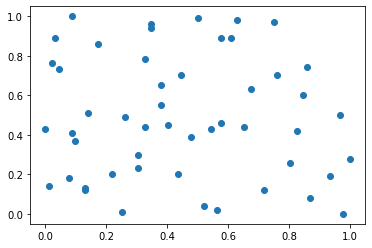

In [39]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [40]:
np.mean(X[:,0])

0.44804347826086954

In [41]:
np.std(X[:,0])

0.2959420733438341

In [42]:
np.mean(X[:,1])

0.4895918367346939

In [43]:
np.std(X[:,1])

0.3044135293226177

# 均值方差归一化Standardization

In [44]:
X2 = np.random.randint(0,100,(50,2))

In [46]:
X2 = np.array(X2,dtype=float)

In [47]:
X2[:10,:]

array([[90., 66.],
       [81., 65.],
       [41., 28.],
       [ 6., 42.],
       [18., 64.],
       [31., 86.],
       [76., 24.],
       [92., 95.],
       [51., 70.],
       [88., 40.]])

In [53]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])

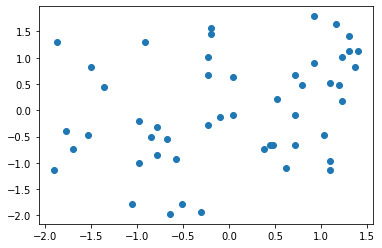

In [54]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [55]:
np.mean(X2[:,0])

-1.7763568394002505e-17

In [56]:
np.std(X2[:,0])

1.0

In [57]:
np.mean(X2[:,1])

1.609823385706477e-17

In [58]:
np.std(X2[:,1])

0.9999999999999999

# 08 Scikit-learn中的Scalar

In [59]:
import numpy as np
from sklearn import datasets

In [60]:
iris = datasets.load_iris()

In [62]:
X = iris.data
y = iris.target

In [63]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=666)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
standardScalar = StandardScaler()

In [67]:
standardScalar.fit(X_train)

StandardScaler()

In [68]:
standardScalar.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [69]:
standardScalar.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [70]:
X_train = standardScalar.transform(X_train)

In [71]:
X_train[:10,:]

array([[-0.90616043,  0.93246262, -1.30856471, -1.28788802],
       [-1.15301457, -0.19551636, -1.30856471, -1.28788802],
       [-0.16559799, -0.64670795,  0.22203084,  0.17260355],
       [ 0.45153738,  0.70686683,  0.95898425,  1.50032315],
       [-0.90616043, -1.32349533, -0.40154513, -0.09294037],
       [ 1.43895396,  0.25567524,  0.56216318,  0.30537551],
       [ 0.3281103 , -1.09789954,  1.0723617 ,  0.30537551],
       [ 2.1795164 , -0.19551636,  1.63924894,  1.23477923],
       [-0.78273335,  2.2860374 , -1.25187599, -1.42065998],
       [ 0.45153738, -2.00028272,  0.44878573,  0.43814747]])

In [72]:
X_test_standard = standardScalar.transform(X_test)

In [74]:
X_test_standard[:10,:]

array([[-0.28902506, -0.19551636,  0.44878573,  0.43814747],
       [-0.04217092, -0.64670795,  0.78891808,  1.63309511],
       [-1.0295875 , -1.77468693, -0.23147896, -0.22571233],
       [-0.04217092, -0.87230374,  0.78891808,  0.96923531],
       [-1.52329579,  0.03007944, -1.25187599, -1.28788802],
       [-0.41245214, -1.32349533,  0.16534211,  0.17260355],
       [-0.16559799, -0.64670795,  0.44878573,  0.17260355],
       [ 0.82181859, -0.19551636,  0.8456068 ,  1.10200727],
       [ 0.57496445, -1.77468693,  0.39209701,  0.17260355],
       [-0.41245214, -1.09789954,  0.39209701,  0.03983159]])

使用归一化后的数据进行KNN分类

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [78]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
knn_clf.score(X_test_standard,y_test)

1.0

注意，此时不能传入没有归一化的数据！

In [80]:
knn_clf.score(X_test, y_test)

0.3333333333333333

In [81]:
X.ndim

2

In [85]:
X.shape[1]

4

In [86]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=666)

In [87]:
from preprocessing import StandardScaler

my_standardScaler = StandardScaler()
my_standardScaler.fit(X_train)

In [88]:
my_standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [89]:
my_standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [90]:
X_train = standardScalar.transform(X_train)

In [91]:
X_train[:10,:]

array([[-0.90616043,  0.93246262, -1.30856471, -1.28788802],
       [-1.15301457, -0.19551636, -1.30856471, -1.28788802],
       [-0.16559799, -0.64670795,  0.22203084,  0.17260355],
       [ 0.45153738,  0.70686683,  0.95898425,  1.50032315],
       [-0.90616043, -1.32349533, -0.40154513, -0.09294037],
       [ 1.43895396,  0.25567524,  0.56216318,  0.30537551],
       [ 0.3281103 , -1.09789954,  1.0723617 ,  0.30537551],
       [ 2.1795164 , -0.19551636,  1.63924894,  1.23477923],
       [-0.78273335,  2.2860374 , -1.25187599, -1.42065998],
       [ 0.45153738, -2.00028272,  0.44878573,  0.43814747]])